# Query Vision Language Model

## Querying Qwen-VL

In [1]:
import nest_asyncio

nest_asyncio.apply()  # Run this first.

model_path = "Qwen/Qwen2.5-VL-3B-Instruct"
chat_template = "qwen2-vl"

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What's shown here: <|vision_start|><|image_pad|><|vision_end|>?<|im_end|>
<|im_start|>assistant



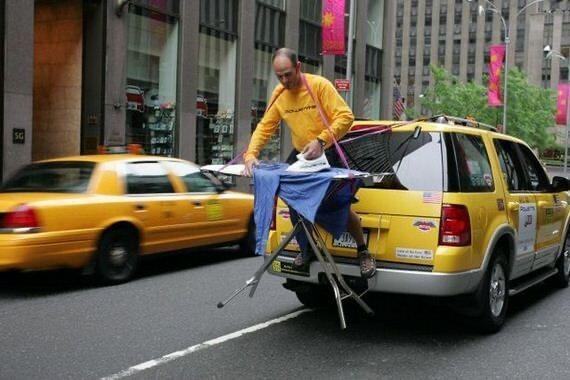

In [2]:
# Lets create a prompt.

from io import BytesIO
import requests
from PIL import Image

from sglang.srt.parser.conversation import chat_templates

image = Image.open(
    BytesIO(
        requests.get(
            "https://github.com/sgl-project/sglang/blob/main/examples/assets/example_image.png?raw=true"
        ).content
    )
)

conv = chat_templates[chat_template].copy()
conv.append_message(conv.roles[0], f"What's shown here: {conv.image_token}?")
conv.append_message(conv.roles[1], "")
conv.image_data = [image]

print(conv.get_prompt())
image

### Query via the offline Engine API

In [3]:
from sglang import Engine

llm = Engine(
    model_path=model_path, chat_template=chat_template, mem_fraction_static=0.8
)

[2025-11-23 21:41:14] INFO utils.py:148: Note: detected 112 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.


[2025-11-23 21:41:14] INFO utils.py:151: Note: NumExpr detected 112 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.


[2025-11-23 21:41:14] INFO utils.py:164: NumExpr defaulting to 16 threads.


[2025-11-23 21:41:16] WARNING server_args.py:1286: Attention backend not explicitly specified. Use flashinfer backend by default.


[2025-11-23 21:41:16] INFO engine.py:123: server_args=ServerArgs(model_path='Qwen/Qwen2.5-VL-3B-Instruct', tokenizer_path='Qwen/Qwen2.5-VL-3B-Instruct', tokenizer_mode='auto', tokenizer_worker_num=1, skip_tokenizer_init=False, load_format='auto', model_loader_extra_config='{}', trust_remote_code=False, context_length=None, is_embedding=False, enable_multimodal=None, revision=None, model_impl='auto', host='127.0.0.1', port=30000, fastapi_root_path='', grpc_mode=False, skip_server_warmup=False, warmups=None, nccl_port=None, checkpoint_engine_wait_weights_before_ready=False, dtype='auto', quantization=None, quantization_param_path=None, kv_cache_dtype='auto', enable_fp32_lm_head=False, modelopt_quant=None, modelopt_checkpoint_restore_path=None, modelopt_checkpoint_save_path=None, modelopt_export_path=None, quantize_and_serve=False, mem_fraction_static=0.8, max_running_requests=None, max_queued_requests=None, max_total_tokens=None, chunked_prefill_size=8192, max_prefill_tokens=16384, sched

[2025-11-23 21:41:22] INFO utils.py:148: Note: detected 112 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[2025-11-23 21:41:22] INFO utils.py:151: Note: NumExpr detected 112 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
[2025-11-23 21:41:22] INFO utils.py:164: NumExpr defaulting to 16 threads.


[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:  50% Completed | 1/2 [00:00<00:00,  1.04it/s]


Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.15it/s]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.13it/s]



Capturing batches (bs=256 avail_mem=12.71 GB):   0%|          | 0/36 [00:00<?, ?it/s]

Capturing batches (bs=232 avail_mem=12.54 GB):   6%|▌         | 2/36 [00:00<00:09,  3.52it/s]

Capturing batches (bs=208 avail_mem=12.50 GB):  17%|█▋        | 6/36 [00:00<00:03,  8.91it/s]

Capturing batches (bs=192 avail_mem=12.47 GB):  22%|██▏       | 8/36 [00:01<00:02, 10.17it/s]

Capturing batches (bs=176 avail_mem=12.47 GB):  28%|██▊       | 10/36 [00:01<00:03,  8.16it/s]

Capturing batches (bs=168 avail_mem=27.26 GB):  28%|██▊       | 10/36 [00:01<00:03,  8.16it/s]

Capturing batches (bs=152 avail_mem=27.21 GB):  36%|███▌      | 13/36 [00:02<00:04,  5.50it/s]

Capturing batches (bs=136 avail_mem=27.17 GB):  42%|████▏     | 15/36 [00:02<00:03,  6.13it/s]

Capturing batches (bs=128 avail_mem=27.16 GB):  47%|████▋     | 17/36 [00:02<00:02,  6.48it/s]

Capturing batches (bs=112 avail_mem=26.64 GB):  50%|█████     | 18/36 [00:02<00:03,  5.96it/s]

Capturing batches (bs=104 avail_mem=26.61 GB):  53%|█████▎    | 19/36 [00:03<00:03,  5.15it/s]

Capturing batches (bs=80 avail_mem=26.57 GB):  61%|██████    | 22/36 [00:03<00:02,  6.57it/s]

Capturing batches (bs=48 avail_mem=26.50 GB):  72%|███████▏  | 26/36 [00:03<00:01,  9.88it/s]

Capturing batches (bs=24 avail_mem=26.44 GB):  78%|███████▊  | 28/36 [00:04<00:00, 11.09it/s]

Capturing batches (bs=8 avail_mem=26.40 GB):  89%|████████▉ | 32/36 [00:04<00:00, 11.95it/s] 

Capturing batches (bs=1 avail_mem=26.33 GB): 100%|██████████| 36/36 [00:04<00:00,  7.85it/s]


In [4]:
out = llm.generate(prompt=conv.get_prompt(), image_data=[image])
print(out["text"])

The image depicts a street scene with a person extending laundry from the back of a yellow taxi. The taxi is parked near a building, and there are other cars visible in the background. The person appears to be tossing the laundry out after loading it into the back of the taxi, which seems unusual and unconventional.


### Query via the offline Engine API, but send precomputed embeddings

In [5]:
# Compute the image embeddings using Huggingface.

from transformers import AutoProcessor
from transformers import Qwen2_5_VLForConditionalGeneration

processor = AutoProcessor.from_pretrained(model_path, use_fast=True)
vision = (
    Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path).eval().visual.cuda()
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
processed_prompt = processor(
    images=[image], text=conv.get_prompt(), return_tensors="pt"
)
input_ids = processed_prompt["input_ids"][0].detach().cpu().tolist()
precomputed_embeddings = vision(
    processed_prompt["pixel_values"].cuda(), processed_prompt["image_grid_thw"].cuda()
)

mm_item = dict(
    modality="IMAGE",
    image_grid_thw=processed_prompt["image_grid_thw"],
    precomputed_embeddings=precomputed_embeddings,
)
out = llm.generate(input_ids=input_ids, image_data=[mm_item])
print(out["text"])

This image shows a man hanging clothes on the back of his yellow taxi cab. The taxi is stopped on a city street, and there are several clothes items visible, including a shirt and a pair of shorts. The scene is well-lit, suggesting it could be daytime, but it appears to be overcast or shaded due to the large shadows cast by the taxi. There are some city buildings and street signs in the background, indicating an urban setting.


## Querying Llama 4 (Vision)

In [7]:
import nest_asyncio

nest_asyncio.apply()  # Run this first.

model_path = "meta-llama/Llama-4-Scout-17B-16E-Instruct"
chat_template = "llama-4"

<|header_start|>user<|header_end|>

What's shown here: <|image|>?<|eot|><|header_start|>assistant<|header_end|>


Image size: (570, 380)


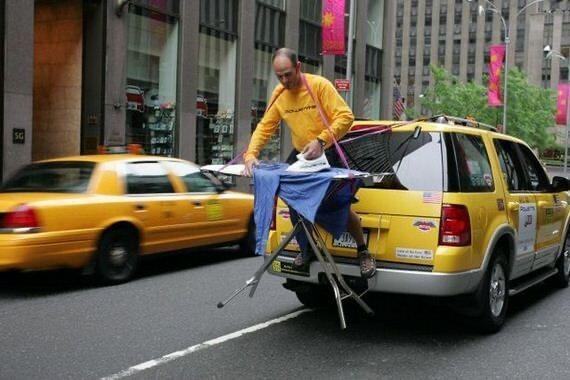

In [8]:
# Lets create a prompt.

from io import BytesIO
import requests
from PIL import Image

from sglang.srt.parser.conversation import chat_templates

image = Image.open(
    BytesIO(
        requests.get(
            "https://github.com/sgl-project/sglang/blob/main/examples/assets/example_image.png?raw=true"
        ).content
    )
)

conv = chat_templates[chat_template].copy()
conv.append_message(conv.roles[0], f"What's shown here: {conv.image_token}?")
conv.append_message(conv.roles[1], "")
conv.image_data = [image]

print(conv.get_prompt())
print(f"Image size: {image.size}")

image

### Query via the offline Engine API

In [9]:
from sglang.test.test_utils import is_in_ci

if not is_in_ci():
    from sglang import Engine

    llm = Engine(
        model_path=model_path,
        trust_remote_code=True,
        enable_multimodal=True,
        mem_fraction_static=0.8,
        tp_size=4,
        attention_backend="fa3",
        context_length=65536,
    )

In [10]:
if not is_in_ci():
    out = llm.generate(prompt=conv.get_prompt(), image_data=[image])
    print(out["text"])

### Query via the offline Engine API, but send precomputed embeddings

In [11]:
if not is_in_ci():
    # Compute the image embeddings using Huggingface.

    from transformers import AutoProcessor
    from transformers import Llama4ForConditionalGeneration

    processor = AutoProcessor.from_pretrained(model_path, use_fast=True)
    model = Llama4ForConditionalGeneration.from_pretrained(
        model_path, torch_dtype="auto"
    ).eval()
    vision = model.vision_model.cuda()
    multi_modal_projector = model.multi_modal_projector.cuda()

In [12]:
if not is_in_ci():
    processed_prompt = processor(
        images=[image], text=conv.get_prompt(), return_tensors="pt"
    )
    print(f'{processed_prompt["pixel_values"].shape=}')
    input_ids = processed_prompt["input_ids"][0].detach().cpu().tolist()

    image_outputs = vision(
        processed_prompt["pixel_values"].to("cuda"), output_hidden_states=False
    )
    image_features = image_outputs.last_hidden_state
    vision_flat = image_features.view(-1, image_features.size(-1))
    precomputed_embeddings = multi_modal_projector(vision_flat)

    mm_item = dict(modality="IMAGE", precomputed_embeddings=precomputed_embeddings)
    out = llm.generate(input_ids=input_ids, image_data=[mm_item])
    print(out["text"])